In [3]:
import warnings
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller



In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Cargar el archivo depurado.csv
data = pd.read_csv('depurado.csv')

# Convertir la columna de fecha a tipo datetime
data['Fecha'] = pd.to_datetime(data['Fecha'])

# Ordenar los datos por fecha
data = data.sort_values('Fecha')

# Seleccionar las columnas de interés
columns_interes = [
    'Diesel bajo azufre',
    'Diesel ultra bajo azufre',
    'Gas licuado de petróleo',
    'Gasolina regular',
    'Gasolina superior',
    'Diesel alto azufre'
]

# Resamplear los datos a un período mensual y sumar los valores para obtener el consumo mensual
monthly_data = data.set_index('Fecha').resample('M').sum()

# Separar los datos en entrenamiento y prueba
train_data, test_data = train_test_split(monthly_data, test_size=0.2, shuffle=False)

# Mostrar las primeras filas del conjunto de entrenamiento
print(train_data.head())


            Unnamed: 0  Aceites lubricantes  Asfalto      Bunker  Ceras  \
Fecha                                                                     
2001-01-31           0                  0.0  27748.99  214581.84    0.0   
2001-02-28           1                  0.0   7503.57  294609.00    0.0   
2001-03-31           2                  0.0  26304.32  315263.80    0.0   
2001-04-30           3                  0.0   7885.89  205653.00    0.0   
2001-05-31           4                  0.0   8443.16  278371.30    0.0   

            Combustible turbo jet  Diesel bajo azufre  \
Fecha                                                   
2001-01-31                    0.0                 0.0   
2001-02-28                    0.0                 0.0   
2001-03-31                    0.0                 0.0   
2001-04-30                    0.0                 0.0   
2001-05-31                    0.0                 0.0   

            Diesel ultra bajo azufre  Gas licuado de petróleo  \
Fecha    

In [10]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import MinMaxScaler

# Escalar los datos
scaler = MinMaxScaler(feature_range=(0, 1))
train_scaled = scaler.fit_transform(train_data)
test_scaled = scaler.transform(test_data)

# Crear secuencias para el LSTM
def create_sequences(data, time_steps=1):
    X, y = [], []
    for i in range(len(data) - time_steps):
        X.append(data[i:(i + time_steps), :])
        y.append(data[i + time_steps, :])
    return np.array(X), np.array(y)

time_steps = 10
X_train, y_train = create_sequences(train_scaled, time_steps)
X_test, y_test = create_sequences(test_scaled, time_steps)

# Primer modelo LSTM
model_1 = Sequential()
model_1.add(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model_1.add(Dropout(0.2))
model_1.add(LSTM(50, return_sequences=False))
model_1.add(Dropout(0.2))
model_1.add(Dense(y_train.shape[1]))
model_1.compile(optimizer='adam', loss='mean_squared_error')

# Entrenar el primer modelo
history_1 = model_1.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

# Segundo modelo LSTM (diferente configuración)
model_2 = Sequential()
model_2.add(LSTM(100, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model_2.add(Dropout(0.3))
model_2.add(LSTM(100, return_sequences=False))
model_2.add(Dropout(0.3))
model_2.add(Dense(y_train.shape[1]))
model_2.compile(optimizer='adam', loss='mean_squared_error')

# Entrenar el segundo modelo
history_2 = model_2.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/20


2024-08-08 12:02:04.664859: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-08-08 12:02:04.665591: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2251] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...
/home/arg/.local/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super(

7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 65ms/step - loss: 0.0733 - val_loss: 144688.5312
Epoch 2/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0428 - val_loss: 144683.2188
Epoch 3/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0314 - val_loss: 144678.3125
Epoch 4/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0269 - val_loss: 144677.4844
Epoch 5/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0240 - val_loss: 144676.2188
Epoch 6/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0230 - val_loss: 144674.2500
Epoch 7/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0214 - val_loss: 144673.0625
Epoch 8/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0198 - val_loss: 144673.1250
Epoch 9/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0203 - val_loss: 144673.7656
Epoch 10/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0192 - val_loss: 144673.7656
Epoch 11/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0192 - val_loss: 144673.5000
Epoch 12/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - 

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step


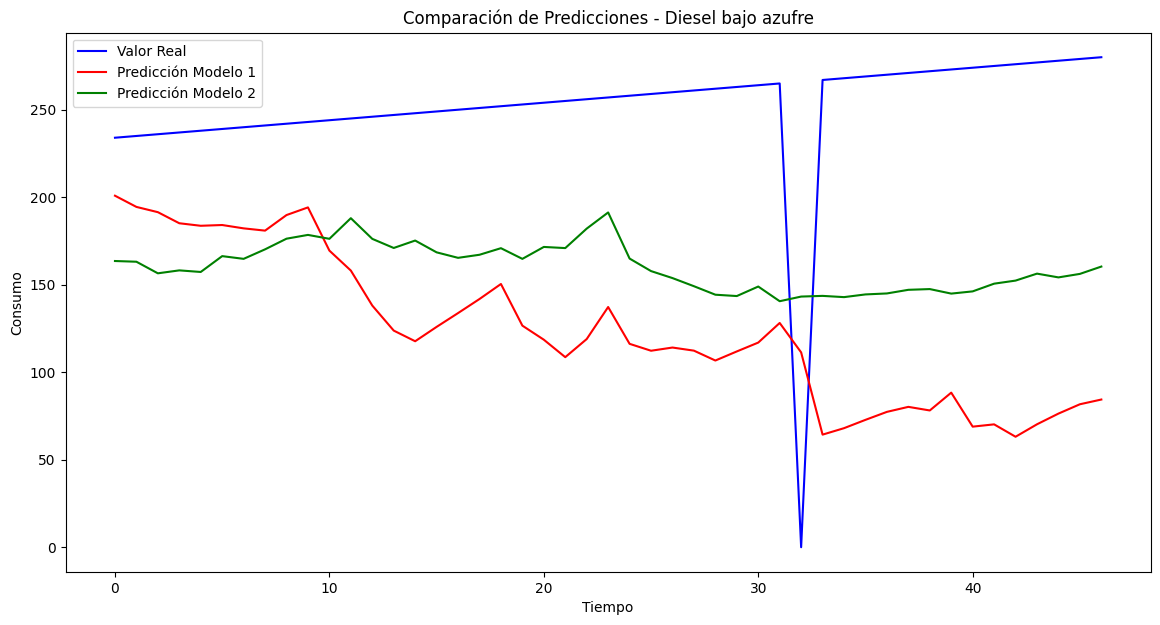

MSE Modelo 1: 126851597025.2309
MSE Modelo 2: 209493111260.55328


In [11]:
import matplotlib.pyplot as plt

# Predecir con ambos modelos
predictions_1 = model_1.predict(X_test)
predictions_2 = model_2.predict(X_test)

# Invertir la escala
predictions_1 = scaler.inverse_transform(predictions_1)
predictions_2 = scaler.inverse_transform(predictions_2)
y_test_inversed = scaler.inverse_transform(y_test)

# Graficar resultados
plt.figure(figsize=(14, 7))
plt.plot(y_test_inversed[:, 0], color='blue', label='Valor Real')
plt.plot(predictions_1[:, 0], color='red', label='Predicción Modelo 1')
plt.plot(predictions_2[:, 0], color='green', label='Predicción Modelo 2')
plt.title('Comparación de Predicciones - Diesel bajo azufre')
plt.xlabel('Tiempo')
plt.ylabel('Consumo')
plt.legend()
plt.show()

# Evaluar las métricas de rendimiento
from sklearn.metrics import mean_squared_error

mse_1 = mean_squared_error(y_test_inversed, predictions_1)
mse_2 = mean_squared_error(y_test_inversed, predictions_2)

print(f'MSE Modelo 1: {mse_1}')
print(f'MSE Modelo 2: {mse_2}')
